In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import statistics as st

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'measurements', 'station', 'stations']

In [7]:
# Save references to each table

station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# ('2017-08-23',)

recent_date = session.query(measurement.date).order_by(measurement.date.desc()).limit(1).all()
recent_date

[('2017-08-23',)]

In [10]:
#type(recent_date[0][0]), this is a tuple within a list, so you need to call it a certain way!!

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [12]:
# Calculate the date one year from the last date in data set.
#not graded?? answer key does not call the date by the variable assigned above

one_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
one_year

datetime.date(2016, 8, 23)

In [13]:
### Perform a query to retrieve the data and precipitation scores
#IS THIS WHAT WE JUST DID ABOVE???

precip_score = session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

last_12_months = pd.DataFrame(
    precip_score,
    columns = ["Date", "Prcp"]
)
last_12_months

,Date,Prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


Text(0, 0.5, 'Inches')

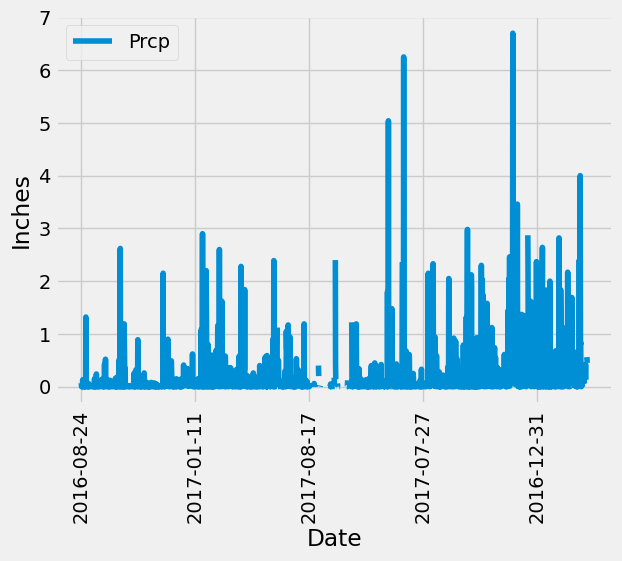

In [14]:
# Sort the dataframe by date

#last_12_months.sort_values(by = "Date")
#last_12_months

# Use Pandas Plotting with Matplotlib to plot the data

#last_12_months.set_index(last_12_months)
#last_12_months.plot(rot=90)

#plt.xlabel("Date") not needed since we established this in set.index above

#plt.show() not needed as well since .plot takes care of this


last_12_months.plot(x = "Date", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data

last_12_months.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset

no_stations = session.query(station.station).count()
no_stations

9

In [17]:
### Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

#TA mark and chatgpt
activity = session.query(measurement.station, func.count()).group_by(measurement.station).order_by(func.count().desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
print(f"question: which station id has the greatest number of observations?")
print(f"answer: {activity[0][0]}.")

question: which station id has the greatest number of observations?
answer: USC00519281.


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#[(54.0, 85.0, 71.66378066378067)]

active_station = session.query(measurement.tobs).filter(measurement.station == activity[0][0]).all()

temps = []

for t in active_station:
    temps.append(t[0])

max(temps)

output = [(min(temps), max(temps), st.mean(temps))]
output

# temps_df = pd.DataFrame(
#    temps,
#    columns = ["Prcp"]
# )
# temps_df

# WHY DOESNT THIS WORK, BUT THE BOTTOM DOES?
# low_high_avg = session.query(func.min(temps_df.Prcp), func.max(temps_df.Prcp), func.avg(temps_df.Prcp)).all()
# low_high_ave

# session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

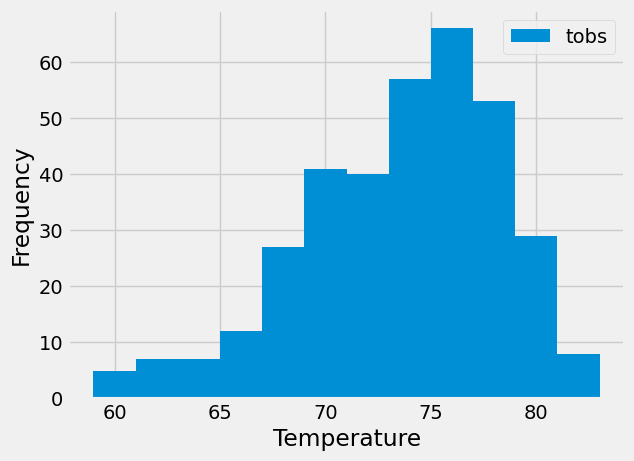

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_hist = session.query(measurement.tobs).filter(measurement.station == activity[0][0]).filter(measurement.date >= one_year).all()
tobs_hist

tobs_df = pd.DataFrame(tobs_hist,
                       columns = ['tobs']
)

# bins related to bars displayed??
tobs_df.plot.hist(xlabel = 'Temperature', bins=12)
plt.xlabel("Temperature")

# Close Session

In [23]:
sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
var_start = session.query(*sel).filter(measurement.date >= one_year).all()
var_start

[(58.0, 74.59058295964125, 87.0)]

In [ ]:
# Close Session
session.close()